In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
df.dropna(inplace=True)

labele={}
for c in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    labele[c] = le

In [7]:
x = df.drop(columns=["target"])
y=df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [12]:
from sklearn.svm import SVC

svm_linear = SVC(kernel="linear",C=1)
svm_linear.fit(x_train,y_train)
y_pred_li = svm_linear.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_test,y_pred_li))
print(classification_report(y_test,y_pred_li))
print(confusion_matrix(y_test,y_pred_li))

0.8146341463414634
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205

[[72 30]
 [ 8 95]]


In [15]:
svm_poly = SVC(kernel="poly",degree=3,C=1)
svm_poly.fit(x_train,y_train)
y_pred_po = svm_poly.predict(x_test)

In [17]:
print(accuracy_score(y_test,y_pred_po))
print(classification_report(y_test,y_pred_po))
print(confusion_matrix(y_test,y_pred_po))

0.9073170731707317
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       102
           1       0.86      0.98      0.91       103

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205

[[ 85  17]
 [  2 101]]


In [18]:
svm_rbf = SVC(kernel="rbf",gamma="scale",C=1)
svm_rbf.fit(x_train,y_train)
y_pred_rbf = svm_rbf.predict(x_test)

In [19]:
print(accuracy_score(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

0.8878048780487805
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

[[85 17]
 [ 6 97]]


In [20]:
df = pd.read_csv("testdata.csv")

In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [23]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)


C:\Users\bojja\AppData\Local\Temp\ipykernel_15596\3815620658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
C:\Users\bojja\AppData\Local\Temp\ipykernel_15596\3815620658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [25]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(), inplace=True)


C:\Users\bojja\AppData\Local\Temp\ipykernel_15596\3649200558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
C:\Users\bojja\AppData\Local\Temp\ipykernel_15596\3649200558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [27]:
import seaborn as sns

In [29]:
num_cols = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term"
]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[
        (df[col] < Q1 - 1.5 * IQR) |
        (df[col] > Q3 + 1.5 * IQR)
    ]



In [32]:

labele={}
for c in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    labele[c] = le

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [34]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [ ]:
x = df.drop(columns=["target"])
y=df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
df = pd.read_csv("traindata.csv")

In [54]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)


C:\Users\bojja\AppData\Local\Temp\ipykernel_15596\2116909383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
C:\Users\bojja\AppData\Local\Temp\ipykernel_15596\2116909383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [55]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(), inplace=True)


C:\Users\bojja\AppData\Local\Temp\ipykernel_15596\3649200558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
C:\Users\bojja\AppData\Local\Temp\ipykernel_15596\3649200558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [59]:

labele={}
for c in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    labele[c] = le

In [60]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [61]:
df.corr()["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [62]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [81]:
x = df[["ApplicantIncome","LoanAmount","Credit_History","Self_Employed","Married","Education","CoapplicantIncome","Loan_Amount_Term","Property_Area"]]
y = df["Loan_Status"]

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [84]:
svm_linear = SVC(kernel="linear",C=1)
svm_linear.fit(x_train,y_train)
y_pred_li = svm_linear.predict(x_test)

In [85]:
print(accuracy_score(y_test,y_pred_li))
print(classification_report(y_test,y_pred_li))
print(confusion_matrix(y_test,y_pred_li))

0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]


In [86]:
svm_poly = SVC(kernel="poly",degree=3,C=1)
svm_poly.fit(x_train,y_train)
y_pred_po = svm_poly.predict(x_test)

In [87]:
print(accuracy_score(y_test,y_pred_po))
print(classification_report(y_test,y_pred_po))
print(confusion_matrix(y_test,y_pred_po))

0.7967479674796748
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123

[[18 25]
 [ 0 80]]


In [88]:
svm_rbf = SVC(kernel="rbf",gamma="scale",C=1)
svm_rbf.fit(x_train,y_train)
y_pred_rbf = svm_rbf.predict(x_test)

In [89]:
print(accuracy_score(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

0.7967479674796748
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123

[[18 25]
 [ 0 80]]


In [90]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

metrics = {}

# Linear SVM
metrics['Linear'] = {
    'Accuracy': accuracy_score(y_test, y_pred_li),
    'Reject Recall': recall_score(y_test, y_pred_li, pos_label=0),
    'F1': f1_score(y_test, y_pred_li, pos_label=0),
    'Confusion': confusion_matrix(y_test, y_pred_li)
}

# Polynomial SVM
metrics['Poly'] = {
    'Accuracy': accuracy_score(y_test, y_pred_po),
    'Reject Recall': recall_score(y_test, y_pred_po, pos_label=0),
    'F1': f1_score(y_test, y_pred_po, pos_label=0),
    'Confusion': confusion_matrix(y_test, y_pred_po)
}

# RBF SVM
metrics['RBF'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rbf),
    'Reject Recall': recall_score(y_test, y_pred_rbf, pos_label=0),
    'F1': f1_score(y_test, y_pred_rbf, pos_label=0),
    'Confusion': confusion_matrix(y_test, y_pred_rbf)
}

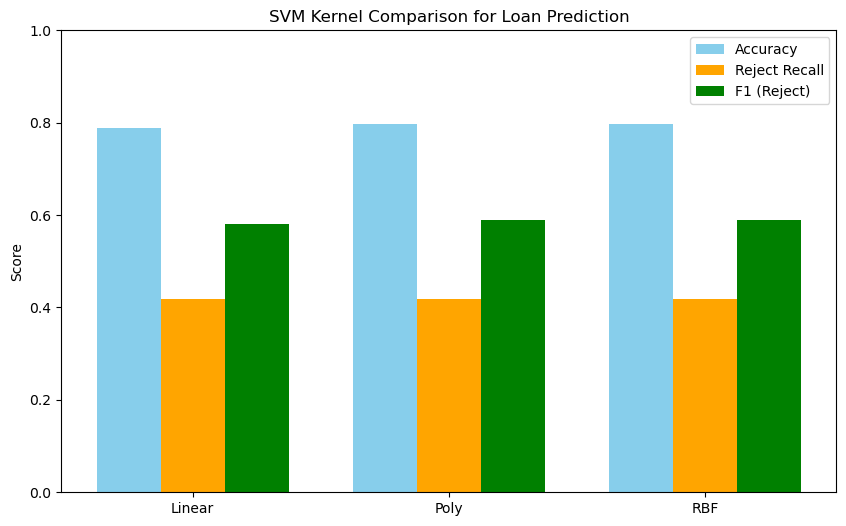

In [91]:

models = list(metrics.keys())
accuracy = [metrics[m]['Accuracy'] for m in models]
reject_recall = [metrics[m]['Reject Recall'] for m in models]
f1_scores = [metrics[m]['F1'] for m in models]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x, reject_recall, width, label='Reject Recall', color='orange')
plt.bar(x + width, f1_scores, width, label='F1 (Reject)', color='green')

plt.xticks(x, models)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("SVM Kernel Comparison for Loan Prediction")
plt.legend()
plt.show()